In [16]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import re 

sns.set()

In [2]:
data = pd.read_csv("dados_anuncios_airbnb.csv")

In [3]:
data.head()

,Título,Preço (R$),Avaliação,Bairro,Imóvel,Características
0,FLAT PARTICULAR NO MELIA - AV. IBIRAPUERA,110,4.90,Indianópolis,Flat inteiro,"['2 hóspedes', '1 quarto', '1 cama', '1 banhei..."
1,Studio novinho a 300 m metrô - Self check in,117,4.80,Consolacao,Apartamento inteiro,"['5 hóspedes', 'Estúdio', '3 camas', '1 banhei..."
2,Studio encantador em São Paulo próximo ao metrô,110,4.87,Consolacao,Flat inteiro,"['2 hóspedes', '1 quarto', '1 cama', '1 banhei..."
3,Flat mobiliado ao lado do Hospital Sirio Libanês,80,4.61,Bela Vista,Flat inteiro,"['2 hóspedes', '1 quarto', '1 cama', '1 banhei..."
4,Suíte moderna com cama de casal no Brooklin,54,4.89,Vila Olímpia,Quarto inteiro,"['2 hóspedes', '1 quarto', '1 cama', '1 banhei..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Título           350 non-null    object 
 1   Preço (R$)       350 non-null    int64  
 2   Avaliação        297 non-null    float64
 3   Bairro           350 non-null    object 
 4   Imóvel           350 non-null    object 
 5   Características  350 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 16.5+ KB


In [52]:
def findQtd(txt, palavra):
    
    search = re.findall(r'(\d+) {}'.format(palavra), str(txt))
    
    if len(search) != 0:
        return int(search[0])
    else:
        return 0

In [ ]:
def findFeature(txt, palavra):
    
    search = re.findall(r'(\d+) {}'.format(palavra), str(txt))
    
    if len(search) != 0:
        return 1
    else:
        return 0

array([0], dtype=int64)

In [5]:
# dados nulos
data.loc[data['Avaliação'].isnull(), :]

,Título,Preço (R$),Avaliação,Bairro,Imóvel,Características
7,Apto Jardins mobiliado Excelente localização,75,NaN,Paraíso,Apartamento inteiro,"['2 hóspedes', '1 quarto', '1 cama', '1 banhei..."
19,Apartamento no Bom Retiro 5min da Rodoviária T...,43,NaN,Bom Retiro,Quarto inteiro,"['2 hóspedes', '2 quartos', '1 cama', '1 banhe..."
27,APARTAMENTO 02-50M²- 10 MINUTOS DO AEROPORTO GRU,100,NaN,Vila Florida,Condomínio inteiro,"['4 hóspedes', '1 quarto', '2 camas', '1 banhe..."
28,La Residence Alamada Jau,91,NaN,Cerqueira César,Flat inteiro,"['2 hóspedes', '1 quarto', '1 cama', '1 banhei..."
44,Apartamento agradável e bem iluminado. V. Pompéia,111,NaN,Água Branca,Apartamento inteiro,"['2 hóspedes', '1 quarto', '1 cama', '1 banhei..."
46,FIQUE PRÓXIMO AO PARQUE DO IBIRAPUERA,99,NaN,Vila Uberabinha,Quarto inteiro,"['2 hóspedes', '1 quarto', '1 cama', '1 banhei..."
48,#208 - Cyclinn Faria Lima Itaim,182,NaN,Itaim Bibi,Apartamento inteiro,"['4 hóspedes', '1 quarto', '3 camas', '1 banhe..."
84,FLAT 104 MARAVILHOSO NOS JARDINS,135,NaN,Cerqueira César,Flat inteiro,"['2 hóspedes', '1 quarto', '1 cama', '1 banhei..."
93,Flat com serviços - Hosp. Sírio Libanês/Paulista,98,NaN,Bela Vista,Flat inteiro,"['2 hóspedes', '1 quarto', '3 camas', '1 banhe..."
98,FIQUE PRÓXIMO AO PARQUE DO IBIRAPUERA,99,NaN,Vila Uberabinha,Quarto inteiro,"['2 hóspedes', '1 quarto', '1 cama', '1 banhei..."


In [6]:
data.columns

Index(['Título', 'Preço (R$)', 'Avaliação', 'Bairro', 'Imóvel',
       'Características'],
      dtype='object')

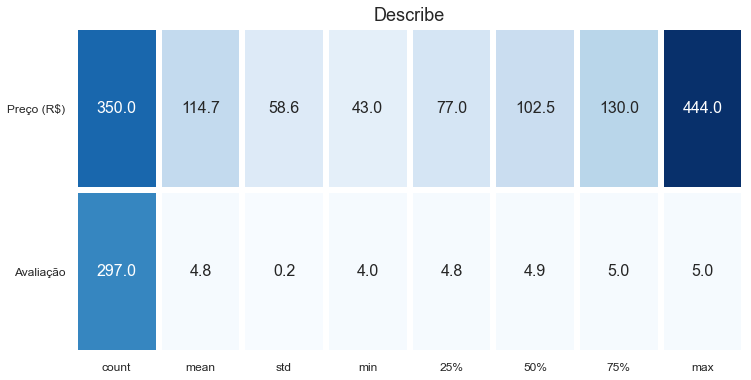

In [7]:
plt.figure(figsize = (12,6))
ax = sns.heatmap(data.describe().T, 
                 cmap = 'Blues', 
                annot = True, fmt = '.1f', 
                linewidths = 5, cbar = False, 
                annot_kws={"size": 16})
ax.set_title('Describe', fontsize = 18)
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0);

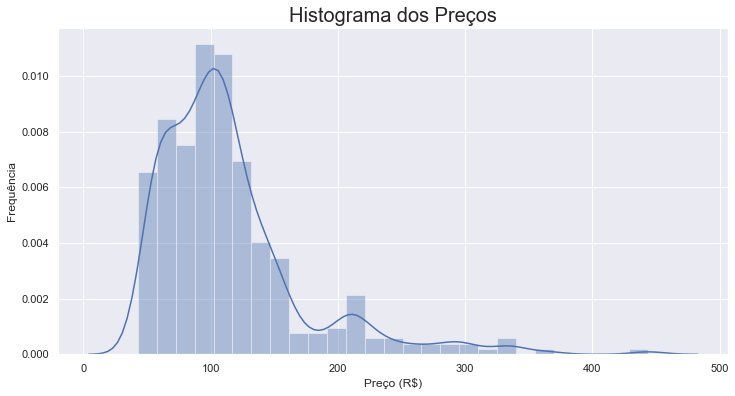

In [8]:
ax = sns.distplot(data['Preço (R$)'])
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma dos Preços', fontsize = 20)
ax.set_ylabel('Frequência')
ax.set_xlabel('Preço (R$)')
plt.show()

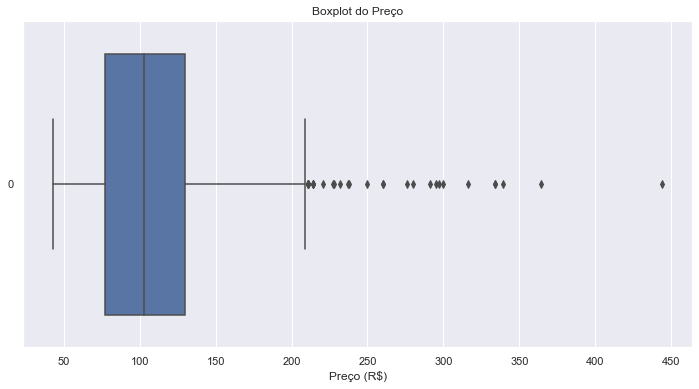

In [9]:
ax = sns.boxplot(data = data['Preço (R$)'], orient='h')
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot do Preço')
ax.set_xlabel('Preço (R$)');

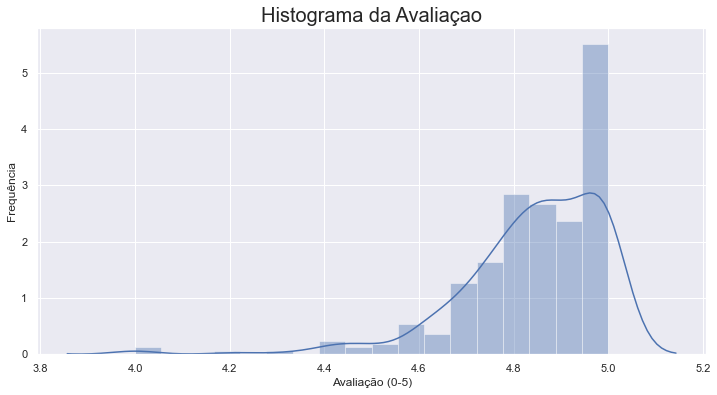

In [10]:
ax = sns.distplot(data['Avaliação'])
ax.figure.set_size_inches(12,6)
ax.set_title('Histograma da Avaliaçao', fontsize = 20)
ax.set_ylabel('Frequência')
ax.set_xlabel('Avaliação (0-5)')
plt.show()

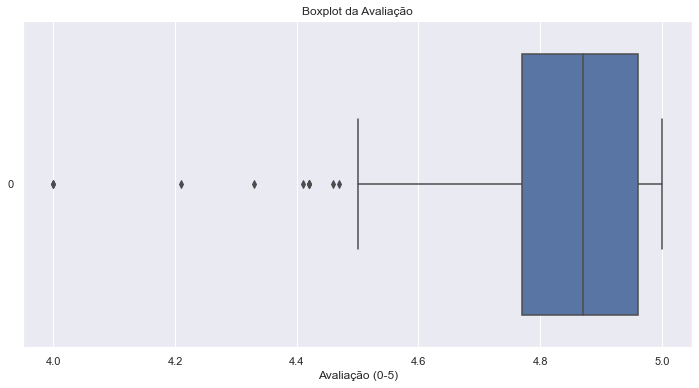

In [11]:
ax = sns.boxplot(data = data['Avaliação'], orient='h')
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot da Avaliação')
ax.set_xlabel('Avaliação (0-5)');

In [20]:
data['Características'].head()

0    ['2 hóspedes', '1 quarto', '1 cama', '1 banhei...
1    ['5 hóspedes', 'Estúdio', '3 camas', '1 banhei...
2    ['2 hóspedes', '1 quarto', '1 cama', '1 banhei...
3    ['2 hóspedes', '1 quarto', '1 cama', '1 banhei...
4    ['2 hóspedes', '1 quarto', '1 cama', '1 banhei...
Name: Características, dtype: object

In [28]:
re.findall(r'(\d+) cama', '2 hospedes, 33 camas')

['33']

In [52]:
def findQtd(txt, palavra):
    
    search = re.findall(r'(\d+) {}'.format(palavra), str(txt))
    
    if len(search) != 0:
        return int(search[0])
    else:
        return 0

In [ ]:
def findQtd(txt, palavra):
    
    search = re.findall(r'(\d+) {}'.format(palavra), str(txt))
    
    if len(search) != 0:
        return int(search[0])
    else:
        return 0

In [66]:

data['Características'].apply(findQtd, palavra = 'Wi-Fi').unique()



array([0], dtype=int64)

In [56]:
data['Características'].unique()

array(["['2 hóspedes', '1 quarto', '1 cama', '1 banheiro', 'Wi-Fi', 'Estacionamento gratuito', 'Cozinha', 'Piscina']",
       "['5 hóspedes', 'Estúdio', '3 camas', '1 banheiro', 'Wi-Fi', 'Cozinha', 'Piscina']",
       "['2 hóspedes', '1 quarto', '1 cama', '1 banheiro', 'Wi-Fi', 'Cozinha', 'Piscina']",
       "['2 hóspedes', '1 quarto', '1 cama', '1 banheiro', 'Wi-Fi', 'Estacionamento gratuito', 'Cozinha']",
       "['2 hóspedes', '1 quarto', '1 cama', '1 banheiros privado', 'Wi-Fi', 'Estacionamento gratuito', 'Cozinha']",
       "['3 hóspedes', '1 quarto', '2 camas', '1 banheiro', 'Wi-Fi', 'Estacionamento gratuito', 'Cozinha', 'Piscina']",
       "['2 hóspedes', '1 quarto', '1 cama', '1 banheiro', 'Wi-Fi', 'Cozinha']",
       "['2 hóspedes', '1 quarto', '1 cama', '1 banheiro', 'Wi-Fi']",
       "['2 hóspedes', 'Estúdio', '1 cama', '1 banheiro', 'Wi-Fi', 'Piscina']",
       "['2 hóspedes', '1 quarto', '1 cama', '1 banheiro compartilhado', 'Wi-Fi', 'Cozinha']",
       "['1 hóspede', '1 q